
# Prospecção de Dados 2022/2023

## Lab class TP05

# Mining Frequent Itemsets - FP-Growth and ECLAT

*A Semi Supervised Learning Tutorial by Andre Falcao and Sara Madeira (DI/FCUL 2021-2022)*

### Summary

1. Mining Frequent Itemsets with Apriori (again)
2. Mining Frequent Itemsets with FP-growth
3. Mining Frequent Itemsets with ECLAT
4. Evaluating performance
5. Putting into perspective
6. Computing Maximal and Closed Itemsets

## 0. Getting Started

We are not using sklearn, but everyone should have mlxtend installed. MLxtend is not installed with Anaconda.If it is not yet installed proceed as follows and run in the command line

`conda install -c conda-forge mlxtend`

 or, if the former does not work

`pip install mlxtend`
 

After this you should be ready to start.


## 1. Mining Frequent Itemsets with Apriori (again)

In this section we follow closely the examples on generating frequent Itemsets via Apriori Algorithm and Association Rules Generation from Frequent Itemsets provided in the documentation of MLxtend by Sebastian Raschka.

### 1.1. Load data




In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [2]:
def load_transactions(file_name, sep=","):
#input: csv file with one transaction per line,
#           where transactions may have a different number of items
#    output: matrix where each row is a vector of items (transaction)
    lines = open(file_name, 'rt').readlines()
    transactions_matrix = []
    for l in lines:
        l = l.rstrip('\n')
        transaction = l.split(sep)
        transactions_matrix.append(transaction)
    return transactions_matrix

groceries=load_transactions("groceries.txt", sep=" ")

len(groceries)

9835

This is exactly the same we have done in previous class, and we will continue by coding the database in a Pandas data frame

In [3]:
#Compute binary database
tr_enc = TransactionEncoder()
trans_array = tr_enc.fit(groceries).transform(groceries)
binary_database = pd.DataFrame(trans_array, columns=tr_enc.columns_)
binary_database

,Instant_food_products,UHT-milk,abrasive_cleaner,artif._sweetener,baby_cosmetics,baby_food,bags,baking_powder,bathroom_cleaner,beef,...,turkey,vinegar,waffles,whipped/sour_cream,whisky,white_bread,white_wine,whole_milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 1.2. Compute Frequent Itemsets using Apriori

We can now input the binary database to apriori and compute frequent itemsets. Consider a minimum support of 2%, 

In [14]:
%timeit FI_apriori = apriori(binary_database, min_support=0.02, use_colnames=True)
FI_apriori

223 ms ± 15.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


,support,itemsets,length
0,0.033452,(UHT-milk),1
1,0.052466,(beef),1
2,0.033249,(berries),1
3,0.026029,(beverages),1
4,0.080529,(bottled_beer),1
...,...,...,...
117,0.032232,"(whole_milk, whipped/sour_cream)",2
118,0.020742,"(yogurt, whipped/sour_cream)",2
119,0.056024,"(whole_milk, yogurt)",2
120,0.023183,"(root_vegetables, whole_milk, other_vegetables)",3


We can modify this data frame and add some columns as before. We will add the size of the discovered itemsets

In [5]:
# Add new column length
FI_apriori['length'] = FI_apriori['itemsets'].apply(lambda x: len(x))
FI_apriori.sort_values(by=['length'], ascending=False)

,support,itemsets,length
121,0.022267,"(whole_milk, other_vegetables, yogurt)",3
120,0.023183,"(root_vegetables, whole_milk, other_vegetables)",3
77,0.021047,"(other_vegetables, fruit/vegetable_juice)",2
89,0.035892,"(tropical_fruit, other_vegetables)",2
88,0.032740,"(other_vegetables, soda)",2
...,...,...,...
36,0.079817,(newspapers),1
35,0.052364,(napkins),1
34,0.028368,(misc._beverages),1
33,0.025826,(meat),1


We can now filter the results based on the desired support and pattern length:

In [6]:
# filter using support and pattern length

FI_apriori_filtered = FI_apriori[ (FI_apriori['support'] >= 0.03) & (FI_apriori['length'] >= 2)]
FI_apriori_filtered


,support,itemsets,length
64,0.034367,"(whole_milk, bottled_water)",2
70,0.030503,"(whole_milk, citrus_fruit)",2
84,0.042603,"(other_vegetables, rolls/buns)",2
85,0.047382,"(root_vegetables, other_vegetables)",2
88,0.032740,"(other_vegetables, soda)",2
89,0.035892,"(tropical_fruit, other_vegetables)",2
91,0.074835,"(whole_milk, other_vegetables)",2
92,0.043416,"(other_vegetables, yogurt)",2
95,0.033249,"(pastry, whole_milk)",2
97,0.030097,"(pip_fruit, whole_milk)",2


#### Exercise
1. Verify how does the number of Frequent itemsets changes with the Minimum support (up to 0.1%)
    - Exponentially
2. Plot the results (suggestion: Use a log plot and a log-log plot)
3. Discuss your findings

In [7]:
#Solution
import matplotlib.pyplot as plt
import numpy as np

min_sups=np.array([0.05, 0.02, 0.01, 0.005, 0.002, 0.001])
n_itemsets=[]
for ms in min_sups:
    FI = apriori(binary_database, min_support=ms, use_colnames=True)
    n=FI.shape[0]
    print(ms, "---->", n)
    n_itemsets.append(n)

0.05 ----> 31
0.02 ----> 122
0.01 ----> 333
0.005 ----> 1001
0.002 ----> 4223
0.001 ----> 13492


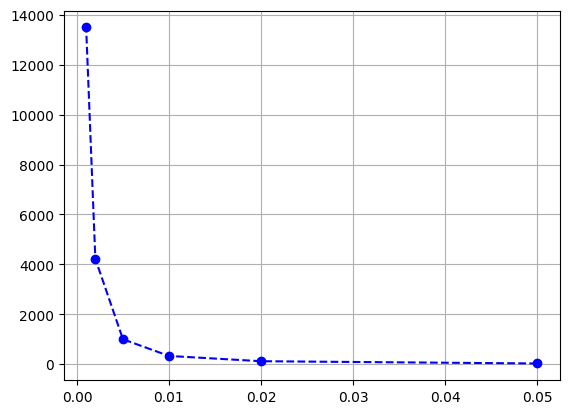

In [8]:
#simple direct plot
plt.plot(min_sups, n_itemsets, '--bo')
plt.grid()
plt.show()

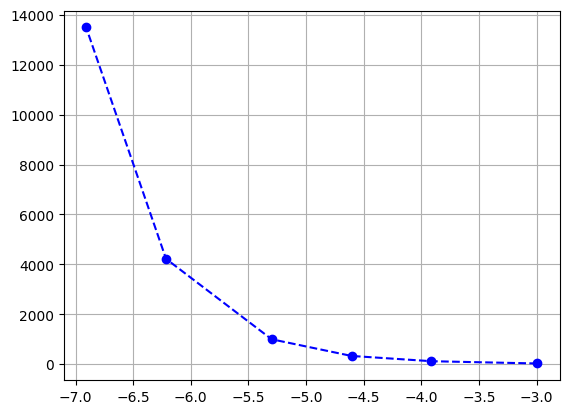

In [15]:
#log scale
plt.plot(np.log(min_sups), n_itemsets, '--bo')
plt.grid()
plt.show()

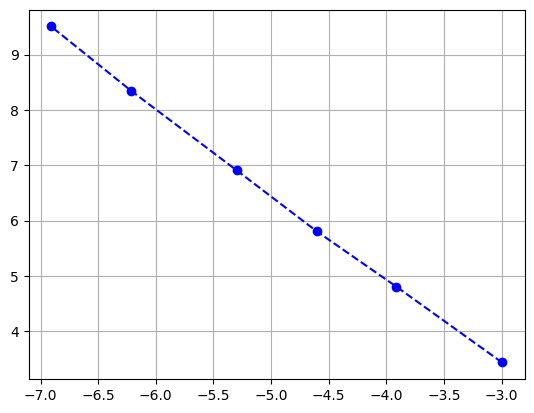

In [9]:
#log-log scale
plt.plot(np.log(min_sups), np.log(n_itemsets), '--bo')
plt.grid()
plt.show()

We can see that the frequent itemsets relation with the minimum support threshold it's proportional to the power law


### 1.3. Generate Association Rules from Frequent Itemsets

As before we are going to generate rules from the 2% support itemsets
The method generate_rules takes dataframes of frequent itemsets as produced by the apriori function in mlxtend.association. 

We are going to generate all rules with over 45% confidence

In [10]:
from mlxtend.frequent_patterns import association_rules

all_rules = association_rules(FI_apriori, metric="confidence", min_threshold=0.45)
all_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(butter),(whole_milk),0.055414,0.255516,0.027555,0.497248,1.946053,0.013395,1.480817
1,(curd),(whole_milk),0.053279,0.255516,0.026131,0.490458,1.919481,0.012517,1.461085
2,(domestic_eggs),(whole_milk),0.063447,0.255516,0.029995,0.472756,1.850203,0.013783,1.412030
3,"(root_vegetables, whole_milk)",(other_vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320
4,"(root_vegetables, other_vegetables)",(whole_milk),0.047382,0.255516,0.023183,0.489270,1.914833,0.011076,1.457687
5,"(other_vegetables, yogurt)",(whole_milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340


## 2. Mining Frequent Itemsets with FP-growth


mlxtend has other methods implemented for Frequent Itemset Mining that behave exactly as apriori, and as such we can use the same procedure above


In [13]:
import mlxtend.frequent_patterns
from mlxtend.frequent_patterns import fpgrowth
#dir(mlxtend.frequent_patterns)
%timeit FI_fpgrowth = fpgrowth(binary_database, min_support=0.02, use_colnames=True)
FI_fpgrowth

234 ms ± 9.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


,support,itemsets
0,0.082766,(citrus_fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical_fruit)
4,0.058058,(coffee)
...,...,...
117,0.022166,"(pork, whole_milk)"
118,0.021657,"(pork, other_vegetables)"
119,0.029995,"(whole_milk, domestic_eggs)"
120,0.022267,"(other_vegetables, domestic_eggs)"


We can verify that the result is exactly the same as apriori, and further confirm it by listing all the possible rules generated from it

In [12]:
all_rules = association_rules(FI_fpgrowth, metric="confidence", min_threshold=0.45)
all_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(other_vegetables, yogurt)",(whole_milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340
1,(butter),(whole_milk),0.055414,0.255516,0.027555,0.497248,1.946053,0.013395,1.480817
2,(curd),(whole_milk),0.053279,0.255516,0.026131,0.490458,1.919481,0.012517,1.461085
3,"(root_vegetables, whole_milk)",(other_vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320
4,"(root_vegetables, other_vegetables)",(whole_milk),0.047382,0.255516,0.023183,0.489270,1.914833,0.011076,1.457687
5,(domestic_eggs),(whole_milk),0.063447,0.255516,0.029995,0.472756,1.850203,0.013783,1.412030


In [18]:
import matplotlib.pyplot as plt
import numpy as np

min_sups=np.array([0.05, 0.02, 0.01, 0.005, 0.002, 0.001])
n_itemsets=[]
for ms in min_sups:
    FI = fpgrowth(binary_database, min_support=ms, use_colnames=True)
    n=FI.shape[0]
    print(ms, "---->", n)
    n_itemsets.append(n)

0.05 ----> 31
0.02 ----> 122
0.01 ----> 333
0.005 ----> 1001
0.002 ----> 4223
0.001 ----> 13492


## 3. Mining Frequent Itemsets with ECLAT

Eclat uses the same principles as apriori, but with the data transformed in a Vertical Data Format (a transposed transaction matrix)

### 3.1. Get ECLAT running from the command line
 
Download the source code (pyfim.py) from the course web page (a debugged version of Christian Borgelt's original implementation available at http://www.borgelt.net/eclat.html) and store it in the same folder as this notebook.


Since the implementation we are using is not a module but a standalone python app, we will run it as if it was a command line execution, preceding the command with !

We will now use last week's toy database, stored in the `trans1.dat` file ( **Take care to not change its extension to .txt. It should remain .dat**):

```
transactions = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

```
compute the frequent itemsets with 60% support, which will be stored in the trans1.out file

The simplest execution of pyfim requires a parameter [-s] for defining minimum support (as a percentage), an input file (data separated by spaces) and the name of an output file


In [16]:
! python pyfim.py -s60 trans1.dat trans1.out

pyfim.py - find frequent item sets (with the eclat algorithm)
version 1.3 (2017.06.02)         (c) 2013-2017   Christian Borgelt
reading trans1.dat ... [5 transaction(s)] done [0.01s].
mining frequent item sets ... [12 sets(s)] done [0.00s].


Let's open the output file and check the 12 itemsets found:

In [17]:
res=open("trans1.out", "rt").read()
print(res)

Milk Kidney_Beans (3)
Milk (3)
Onion Kidney_Beans Eggs (3)
Onion Kidney_Beans (3)
Onion Eggs (3)
Onion (3)
Yogurt Kidney_Beans (3)
Yogurt (3)
Eggs Kidney_Beans (4)
Eggs (4)
Kidney_Beans (5)



### Run ECLAT directly from a Jupyter Notebook


It would be possible to parse and work with the above output, but it would be more convenient to get the data directly from `pyfim`. As this is a Python program it is not too complex to make it compatible with the data structures we are used to. Currently we can run the pyfim implementation of ECLAT, by importing it into a Notebook, as with any regular Python module:

`from pyfim import pyeclat`

And we can just call that function with with an appropriate dataset in a list of transactions (each one also a python list). To run eclat directly from a notebook we just need to import the data set, as the original file was modified so that the output is now compatible with `mlxtend`. Please note that for compatibility with mlextend the support produced is not absolute support but relative support

**IMPORTANT NOTE:** make sure the `pyfim.py` file is in the same directory as this notebook

In [19]:
from pyfim import pyeclat
import pandas as pd
toy_ds =load_transactions("trans1.dat", sep=" ")
toy_ds

[['Milk', 'Onion', 'Nutmeg', 'Kidney_Beans', 'Eggs', 'Yogurt', ''],
 ['Dill', 'Onion', 'Nutmeg', 'Kidney_Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney_Beans', 'Eggs'],
 ['Milk', 'Unicorn', 'Corn', 'Kidney_Beans', 'Yogurt'],
 ['Corn', 'Onion', 'Onion', 'Kidney_Beans', 'Ice_cream', 'Eggs']]

In [20]:
FI_eclat= pyeclat(toy_ds, 0.6)
FI_eclat

,support,itemsets
0,0.6,"(Milk, Kidney_Beans)"
1,0.6,"(Milk,)"
2,0.6,"(Onion, Kidney_Beans, Eggs)"
3,0.6,"(Onion, Kidney_Beans)"
4,0.6,"(Onion, Eggs)"
5,0.6,"(Onion,)"
6,0.6,"(Yogurt, Kidney_Beans)"
7,0.6,"(Yogurt,)"
8,0.8,"(Eggs, Kidney_Beans)"
9,0.8,"(Eggs,)"


These can be usually transformed into rules with our familiar `association_rules` function rom the `mlextend` package

In [21]:
# Generate association rules with confidence >= 90%
rules = association_rules(FI_eclat, metric="confidence", min_threshold=0.80)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Milk),(Kidney_Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
1,"(Onion, Eggs)",(Kidney_Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
2,"(Onion, Kidney_Beans)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
3,(Onion),"(Eggs, Kidney_Beans)",0.6,0.8,0.6,1.0,1.25,0.12,inf
4,(Onion),(Kidney_Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
5,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
6,(Yogurt),(Kidney_Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
7,(Eggs),(Kidney_Beans),0.8,1.0,0.8,1.0,1.00,0.00,inf
8,(Kidney_Beans),(Eggs),1.0,0.8,0.8,0.8,1.00,0.00,1.0


#### Exercises

Try ECLAT using the same method for the `groceries` dataset but with min_support of 0.02 and lift above 2.5

In [25]:
#solution
FI_eclat_groce = pyeclat(groceries, supp=0.02)
FI_eclat_groce

,support,itemsets
0,0.021047,"(chewing_gum,)"
1,0.022369,"(grapes,)"
2,0.023284,"(cat_food,)"
3,0.024504,"(hard_cheese,)"
4,0.024504,"(sliced_cheese,)"
...,...,...
117,0.056634,"(rolls/buns, whole_milk)"
118,0.183935,"(rolls/buns,)"
119,0.074835,"(other_vegetables, whole_milk)"
120,0.193493,"(other_vegetables,)"


In [26]:
groce_rules = association_rules(FI_eclat_groce, metric="lift", min_threshold=2.5)
groce_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(pip_fruit),(tropical_fruit),0.075648,0.104931,0.020437,0.270161,2.574648,0.012499,1.226392
1,(tropical_fruit),(pip_fruit),0.104931,0.075648,0.020437,0.194767,2.574648,0.012499,1.147931
2,"(whole_milk, other_vegetables)",(root_vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900
3,(root_vegetables),"(whole_milk, other_vegetables)",0.108998,0.074835,0.023183,0.212687,2.842082,0.015026,1.175091


## 4. Evaluating performance


### 4.1 Comparing all approaches (apriori, fp-growth and eclat on different datasets

For the following examples we are going to use another dataset for US census data. It has almost 50,000 transactions and shows a different way of using Association Rule learning. This adatset comes from the [Christian Borgelt](http://www.borgelt.net/eclat.html) web site (the same for eclat) and shows a typical columnar data set transformed into patterns




In [27]:
census=load_transactions("census.dat", sep=" ")
len(census)

48842

As several pairs columns-value are very prevalent we are going to slighlty edit it so that more relevant results are displayed. Accordingly we are going to remove each occurrence of `gain=none`,`loss=none`,`country=United-States` from the data set

In [28]:
census_f=[]
filters=frozenset(['gain=none','loss=none','country=United-States'])
for tr in census:
    ft=[i for i in tr if i not in filters and i.find("edu_num=")<0]
    census_f.append(ft)
    
tr_enc = TransactionEncoder()
trans_array = tr_enc.fit(census_f).transform(census_f)
census_database = pd.DataFrame(trans_array, columns=tr_enc.columns_)

In [29]:
census_database.head()

,age=middle-aged,age=old,age=senior,age=young,country=?,country=Cambodia,country=Canada,country=China,country=Columbia,country=Cuba,...,sex=Male,workclass=?,workclass=Federal-gov,workclass=Local-gov,workclass=Never-worked,workclass=Private,workclass=Self-emp-inc,workclass=Self-emp-not-inc,workclass=State-gov,workclass=Without-pay
0,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [34]:
FI_apriori=apriori(census_database, min_support=0.1, use_colnames=True)
FI_apriori

,support,itemsets
0,0.484276,(age=middle-aged)
1,0.198047,(age=senior)
2,0.297183,(age=young)
3,0.164305,(education=Bachelors)
4,0.323164,(education=HS-grad)
...,...,...
533,0.144118,"(relationship=Husband, age=middle-aged, marita..."
534,0.113836,"(relationship=Husband, race=White, sex=Male, s..."
535,0.127902,"(relationship=Husband, race=White, sex=Male, m..."
536,0.130523,"(relationship=Husband, marital=Married-civ-spo..."


In [35]:
%timeit apriori(census_database, min_support=0.1, use_colnames=True);

1.74 s ± 99.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
FI_fpg=fpgrowth(census_database, min_support=0.1, use_colnames=True)
FI_fpg

,support,itemsets
0,0.855043,(race=White)
1,0.760718,(salary<=50K)
2,0.668482,(sex=Male)
3,0.585091,(hours=full-time)
4,0.484276,(age=middle-aged)
...,...,...
533,0.102985,"(relationship=Own-child, marital=Never-married..."
534,0.100528,"(race=White, occupation=Sales)"
535,0.118525,"(sex=Male, occupation=Craft-repair)"
536,0.112690,"(race=White, occupation=Craft-repair)"


In [37]:
%timeit fpgrowth(census_database, min_support=0.1, use_colnames=True)

956 ms ± 27.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
FI_eclat= pyeclat(census_f, 0.10)
FI_eclat

,support,itemsets
0,0.100794,"(occupation=Other-service,)"
1,0.104930,"(relationship=Unmarried,)"
2,0.100528,"(occupation=Sales, race=White)"
3,0.112690,"(occupation=Sales,)"
4,0.114881,"(occupation=Adm-clerical,)"
...,...,...
533,0.594243,"(workclass=Private, race=White)"
534,0.694198,"(workclass=Private,)"
535,0.637873,"(salary<=50K, race=White)"
536,0.760718,"(salary<=50K,)"


In [39]:
%timeit pyeclat(census_f, 0.10)

1.08 s ± 53.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### A Blast from the past - PD_freqitems

Let's also used our our recursive approach developed in last class with a few tweaks for computing efficiency 

In [40]:
from PD_freqitems import freqitemsets
FI_freqitems= freqitemsets(census_f, 0.10)
FI_freqitems

,support,itemsets
0,0.257627,(relationship=Not-in-family)
1,0.118218,"(relationship=Not-in-family, age=middle-aged)"
2,0.102125,"(relationship=Not-in-family, salary<=50K, age=..."
3,0.100160,"(race=White, relationship=Not-in-family, age=m..."
4,0.231502,"(relationship=Not-in-family, salary<=50K)"
...,...,...
533,0.668482,(sex=Male)
534,0.372364,"(hours=full-time, sex=Male)"
535,0.155215,(relationship=Own-child)
536,0.585091,(hours=full-time)


We can verify that each method behaved approprately and generated the exact same frequent itemsets. To generate the rules let's pick one of them tand select only those rules with a lift above 3.0

In [41]:
all_rules = association_rules(FI_apriori, metric="confidence", min_threshold=0.7)
res=all_rules[all_rules["lift"]>=3]
print("Number of Generated Rules:", len(res))
res

Number of Generated Rules: 13


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
109,(relationship=Own-child),"(marital=Never-married, age=young)",0.155215,0.221080,0.118586,0.764015,3.455828,0.084272,3.300722
426,"(race=White, relationship=Own-child)","(marital=Never-married, age=young)",0.130400,0.221080,0.101102,0.775318,3.506953,0.072273,3.466765
443,"(relationship=Own-child, marital=Never-married)","(salary<=50K, age=young)",0.138201,0.281909,0.117972,0.853630,3.028032,0.079012,4.905986
444,"(relationship=Own-child, age=young)","(marital=Never-married, salary<=50K)",0.124667,0.314975,0.117972,0.946297,3.004356,0.078705,12.755714
445,"(relationship=Own-child, salary<=50K)","(marital=Never-married, age=young)",0.152942,0.221080,0.117972,0.771352,3.489014,0.084160,3.406634
446,(relationship=Own-child),"(marital=Never-married, age=young, salary<=50K)",0.155215,0.217927,0.117972,0.760058,3.487670,0.084147,3.259425
861,"(relationship=Own-child, marital=Never-married...","(salary<=50K, age=young)",0.116826,0.281909,0.100651,0.861549,3.056125,0.067717,5.186617
863,"(relationship=Own-child, salary<=50K, race=White)","(marital=Never-married, age=young)",0.128435,0.221080,0.100651,0.783676,3.544759,0.072257,3.600710
864,"(relationship=Own-child, salary<=50K, age=young)","(race=White, marital=Never-married)",0.123930,0.270628,0.100651,0.812159,3.001020,0.067112,3.882929
865,"(relationship=Own-child, race=White, age=young)","(marital=Never-married, salary<=50K)",0.105974,0.314975,0.100651,0.949768,3.015378,0.067272,13.637271


## 5. Putting all into perspective

### 5.1. Performance comparison of all approaches

Let's now compare all three approaches in terms of performance:

* apriori with MLxtend
* FPGrowth with MLxtend
* ECLAT from pyfim
* recursive PD approach


1. Test performance with %timeit 
2. Test different support levels [0.01, 0.005, 0.002] 
3. If you are feeling confident, you can get the results of %timeit into a variable by using: `result = %timeit -o (rest of command goes here)`, process the string to extract the average time and store the results of each run in a list for easier comparison. 

In [43]:
%timeit FI_apriori= apriori(census_database, 0.10)
%timeit FI_fpg= fpgrowth(census_database, 0.10)
%timeit FI_eclat= pyeclat(census_f, 0.10)
%timeit FI_PD= freqitemsets(census_f, 0.10)

1.23 s ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
736 ms ± 3.72 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
791 ms ± 6.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.69 s ± 80.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
result = %timeit -o apriori(census_database, 0.10)
print("The average time is:", result.average)

1.25 s ± 40.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The average time is: 1.2474402142856889


Let's do something abreviated by just timing each algorithm once for each level of support

In [45]:
import time

D={"threshold": [0.2, 0.1, 0.05, 0.02, 0.015], 
   "num_itemsets":[],
   "apriori":[], 
   "FP-growth":[], 
   "ECLAT":[], 
   "PD":[]}

#WARNING! 0.01 sometimes crashes my computer it may well crash yours! 
for min_supp in D["threshold"]:
    t0 = time.time()
    FI_apriori=apriori(census_database, min_supp)
    t1 = time.time()
    D["num_itemsets"].append(FI_apriori.shape[0])
    D["apriori"].append(t1-t0)

    FI_fpg= fpgrowth(census_database, min_supp)
    t2 = time.time()
    D["FP-growth"].append(t2-t1)

    FI_eclat= pyeclat(census_f, min_supp)    
    t3 = time.time()
    D["ECLAT"].append(t3-t2)

    FI_pdfis= freqitemsets(census_f, min_supp)    
    t4 = time.time()
    D["PD"].append(t4-t3)

    
    print(min_supp, FI_apriori.shape[0],"\n\tApriori time:", t1-t0, 
          "\n\tFP-growth time:",t2-t1,
          "\n\tECLAT time:", t3-t2,
          "\n\tPD time:", t4-t3)
    

df_performance=pd.DataFrame(D)
df_performance

0.2 139 
	Apriori time: 0.33499717712402344 
	FP-growth time: 0.5779998302459717 
	ECLAT time: 0.741999626159668 
	PD time: 1.5570001602172852
0.1 538 
	Apriori time: 1.3270020484924316 
	FP-growth time: 0.9589986801147461 
	ECLAT time: 0.8460004329681396 
	PD time: 4.834998369216919
0.05 1623 
	Apriori time: 5.80300235748291 
	FP-growth time: 0.9665441513061523 
	ECLAT time: 1.4209976196289062 
	PD time: 9.871000051498413
0.02 6128 
	Apriori time: 36.908254623413086 
	FP-growth time: 1.593001127243042 
	ECLAT time: 2.1169981956481934 
	PD time: 26.854543209075928
0.015 8921 
	Apriori time: 61.60180330276489 
	FP-growth time: 2.009002208709717 
	ECLAT time: 2.038999080657959 
	PD time: 33.81874227523804


,threshold,num_itemsets,apriori,FP-growth,ECLAT,PD
0,0.200,139,0.334997,0.578000,0.742000,1.557000
1,0.100,538,1.327002,0.958999,0.846000,4.834998
2,0.050,1623,5.803002,0.966544,1.420998,9.871000
3,0.020,6128,36.908255,1.593001,2.116998,26.854543
4,0.015,8921,61.601803,2.009002,2.038999,33.818742


#### Exercises

**Part A** - Explore graphically the performance differences between the algorithms and discuss the results
1. Show thow the number of itemsets changes with the thresholds
2. Plot the timings of each approach
3. plot the log-log timings of each approach


<Axes: xlabel='threshold'>

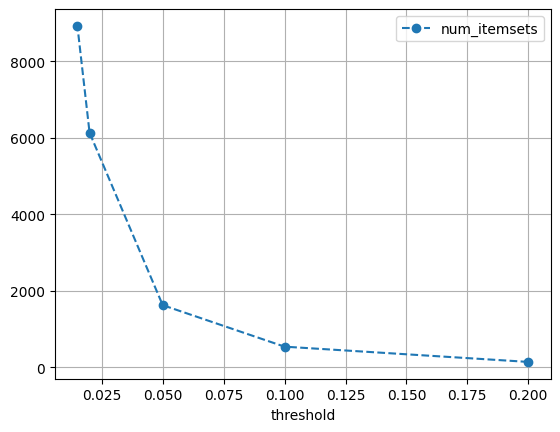

In [52]:
#solution 
df_performance.plot(x="threshold", y="num_itemsets", ls="--", marker="o", grid=True)

<Axes: xlabel='num_itemsets'>

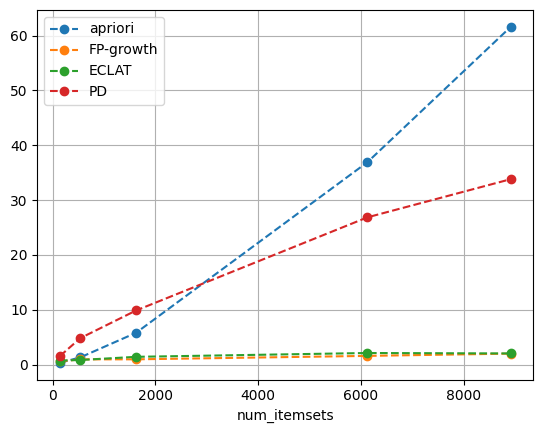

In [58]:
#solution - Ex 2
df_performance.drop(columns=["threshold"]).plot(x="num_itemsets", ls="--", marker="o", grid=True)

<Axes: xlabel='num_itemsets'>

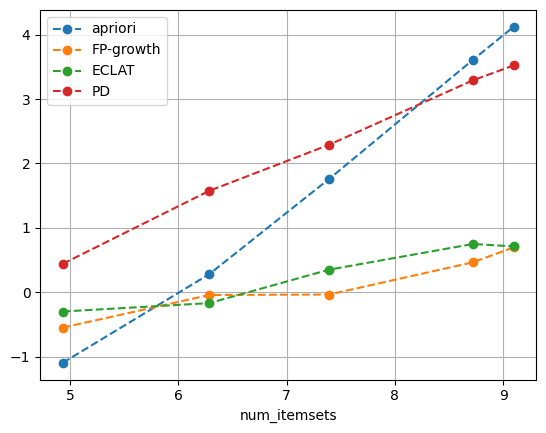

In [57]:
#solution Ex 3
#for col in df_performance.drop(columns=["threshold", "num_itemsets"]).columns:
#    plt.plot(np.log(df_performance.num_itemsets), np.log(df_performance[col]), ls="--", marker="o")


df_performance.drop(columns="threshold").apply(np.log).plot(x="num_itemsets", marker="o", ls="--", grid=True)

#### Exercises - Part B

1. Do the same analysis for the **Groceries** Dataset

**Now answer the following questions:**

1. What does it mean "support of 3%" ? How many itemsets did you find at this support level?
    - That itemset appears 3% of the time;
2. Explain in your own words what does it mean to have support of 3% and confidence of 40%
    - The itemset appears 3% of the time and it appears 40% of the time in it's subset;
3. Explain in your own words what does a lift of 6 means. Why is this above 1.0?
    - (?)
4. Explain in your own words what does a conviction of 1.2 means.
    - (?)
5. How does performance scale by changing the number of transactions? 
    - It scales exponentially(?)
6. In which conditions FP-growth is better than apriori?
    - When the dataset is smaller (?)
8. Identify the FIVE most relevant rules of this dataset and justify your criteria of choice
    - 

In [59]:
#open data
groceries=load_transactions("groceries.txt", sep=" ")

#preprocessing
tr_enc = TransactionEncoder()
trans_array = tr_enc.fit(groceries).transform(groceries)
groceries_db = pd.DataFrame(trans_array, columns=tr_enc.columns_)

In [62]:
#compute performance
Dg={"threshold": [0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001], 
   "num_itemsets":[],
   "apriori":[], 
   "FP-growth":[], 
   "ECLAT":[], 
   "PD":[]}
#continue here!

for min_supp in D["threshold"]:
    t0 = time.time()
    FI_apriori=apriori(groceries_db, min_supp)
    t1 = time.time()
    Dg["num_itemsets"].append(FI_apriori.shape[0])
    Dg["apriori"].append(t1-t0)

    FI_fpg= fpgrowth(groceries_db, min_supp)
    t2 = time.time()
    Dg["FP-growth"].append(t2-t1)

    FI_eclat= pyeclat(groceries_db, min_supp)    
    t3 = time.time()
    Dg["ECLAT"].append(t3-t2)

    FI_pdfis= freqitemsets(groceries_db, min_supp)    
    t4 = time.time()
    Dg["PD"].append(t4-t3)

    
    print(min_supp, FI_apriori.shape[0],"\n\tApriori time:", t1-t0, 
          "\n\tFP-growth time:",t2-t1,
          "\n\tECLAT time:", t3-t2,
          "\n\tPD time:", t4-t3)
    

df_groce=pd.DataFrame(D)
df_groce


0.2 1 
	Apriori time: 0.006997108459472656 
	FP-growth time: 0.07000112533569336 
	ECLAT time: 0.0050160884857177734 
	PD time: 0.0009846687316894531
0.1 8 
	Apriori time: 0.009000778198242188 
	FP-growth time: 0.0729982852935791 
	ECLAT time: 0.013002634048461914 
	PD time: 0.001999378204345703
0.05 31 
	Apriori time: 0.03999686241149902 
	FP-growth time: 0.1210017204284668 
	ECLAT time: 0.03000164031982422 
	PD time: 0.000997781753540039
0.02 122 
	Apriori time: 0.17299699783325195 
	FP-growth time: 0.18700218200683594 
	ECLAT time: 0.08899617195129395 
	PD time: 0.0010020732879638672
0.015 180 
	Apriori time: 0.3009977340698242 
	FP-growth time: 0.2370007038116455 
	ECLAT time: 0.1380023956298828 
	PD time: 0.0009963512420654297


,threshold,num_itemsets,apriori,FP-growth,ECLAT,PD
0,0.200,139,0.334997,0.578000,0.742000,1.557000
1,0.100,538,1.327002,0.958999,0.846000,4.834998
2,0.050,1623,5.803002,0.966544,1.420998,9.871000
3,0.020,6128,36.908255,1.593001,2.116998,26.854543
4,0.015,8921,61.601803,2.009002,2.038999,33.818742


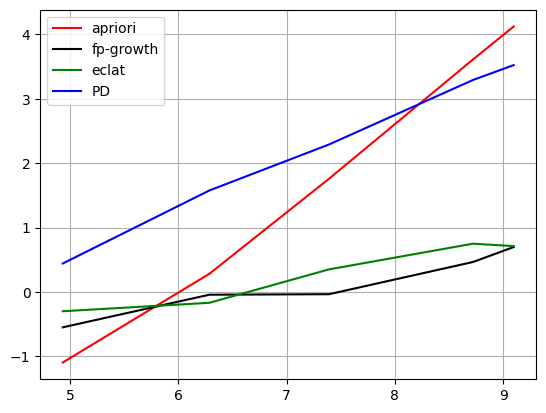

In [64]:
#make graphics - here is the final solution

plt.plot(np.log(df_groce["num_itemsets"]), np.log(df_groce["apriori"]),   c="r", label="apriori")
plt.plot(np.log(df_groce["num_itemsets"]), np.log(df_groce["FP-growth"]), c="k", label="fp-growth")
plt.plot(np.log(df_groce["num_itemsets"]), np.log(df_groce["ECLAT"]),     c="g", label="eclat")
plt.plot(np.log(df_groce["num_itemsets"]), np.log(df_groce["PD"]),        c="b", label="PD")
plt.grid()
plt.legend()
plt.show()

## 6. Mining Maximal and Closed itemsets


Another algorithm for Frequent itemsets mining is FP-Max is also present in mlxtend and finds only maximal itemsets. To run it we follow the exact same pattern we have seen for apriori and FP-growth. We thus need the transaction encoder  to fit the data set and encode it in a pandas DataFrame

Let's check the maximal itemsets with over 30% support

In [66]:
from mlxtend.frequent_patterns import fpmax

FI_fpmax=fpmax(census_database, min_support=0.3, use_colnames=True)
FI_fpmax



,support,itemsets
0,0.323164,(education=HS-grad)
1,0.314975,"(marital=Never-married, salary<=50K)"
2,0.331518,(sex=Female)
3,0.365403,"(race=White, relationship=Husband, marital=Mar..."
4,0.331805,"(salary<=50K, age=middle-aged)"
5,0.338274,"(workclass=Private, age=middle-aged)"
6,0.340117,"(sex=Male, age=middle-aged)"
7,0.411408,"(race=White, age=middle-aged)"
8,0.317739,"(race=White, hours=full-time, sex=Male)"
9,0.349617,"(salary<=50K, hours=full-time, workclass=Private)"


Note that we cannot generate rules with FPmax as we do not have the support of each subset for computing any other statistic that allows rule generation.

### Finding closed and maximal itemsets with ECLAT

Running pyfim directly it is possible to generate closed and maximal itemsets directly using the options -tm and -tc respectively.

`! python pyfim.py -s30 census.dat census_closed30.txt -tm`

In [67]:
! python pyfim.py -s30 census.dat census_maximal30.txt -tm
! python pyfim.py -s30 census.dat census_closed30.txt -tc


pyfim.py - find frequent item sets (with the eclat algorithm)
version 1.3 (2017.06.02)         (c) 2013-2017   Christian Borgelt
reading census.dat ... [48842 transaction(s)] done [0.19s].
mining frequent item sets ... [32 sets(s)] done [1.43s].
pyfim.py - find frequent item sets (with the eclat algorithm)
version 1.3 (2017.06.02)         (c) 2013-2017   Christian Borgelt
reading census.dat ... [48842 transaction(s)] done [0.18s].
mining frequent item sets ... [292 sets(s)] done [0.82s].


However we can currently use the `target` option to specify which frequent itemsets are required

for closed itemsets we can set `target ='c'` 

In [68]:
census_closed = pyeclat(census_f, 0.3, target="c")    
print("Number of Closed Itemsets", len(census_closed))
census_closed

Number of Closed Itemsets 44


,support,itemsets
0,0.323164,"(education=HS-grad,)"
1,0.314975,"(marital=Never-married, salary<=50K)"
2,0.329982,"(marital=Never-married,)"
3,0.331518,"(sex=Female,)"
4,0.365403,"(relationship=Husband, race=White, marital=Mar..."
5,0.365423,"(relationship=Husband, race=White, marital=Mar..."
6,0.365607,"(relationship=Husband, race=White, sex=Male)"
7,0.365628,"(relationship=Husband, race=White)"
8,0.403403,"(relationship=Husband, marital=Married-civ-spo..."
9,0.403423,"(relationship=Husband, marital=Married-civ-spo..."


We can generate the maximal itemsets with `target= 'm'`

Compare the results with the ones produced from MLExtend

In [69]:
census_maximal = pyeclat(census_f, 0.3, target="m")    
print("Number of Maximal Itemsets", len(census_maximal))
census_maximal

Number of Maximal Itemsets 16


,support,itemsets
0,0.323164,"(education=HS-grad,)"
1,0.314975,"(marital=Never-married, salary<=50K)"
2,0.331518,"(sex=Female,)"
3,0.365403,"(relationship=Husband, race=White, marital=Mar..."
4,0.331805,"(age=middle-aged, salary<=50K)"
5,0.338274,"(age=middle-aged, workclass=Private)"
6,0.340117,"(age=middle-aged, sex=Male)"
7,0.411408,"(age=middle-aged, race=White)"
8,0.317739,"(hours=full-time, sex=Male, race=White)"
9,0.349617,"(hours=full-time, workclass=Private, salary<=50K)"


In [71]:
census_all = pyeclat(census_f, 0.3)    
print("Number of Maximal Itemsets", len(census_all))

Number of Maximal Itemsets 44



**Exercise** How to generate rules for the Maximal items sets? 
1. Describe the general procedure
2. Implement it!